In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, f1_score
import sklearn

/Users/jd/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the dataset
df = pd.read_csv("/Users/jd/UNI/BigData/BigDataProject-Classification/Rate/Rate_Cleaned.csv",index_col=0)
import numpy as np
# Assuming the dataset is very large, select the random 5,000 rows as a subset for analysis to manage memory and computational efficiency.
num_rows = df.shape[0]
random_rows = np.random.choice(num_rows, size=5000, replace=False)
subset_df = df.iloc[random_rows, :]
subset_df.shape[0]

5000

In [3]:
# Define features and target
features = [ 'StateCode', 'SourceName', 'RatingAreaId', 'Tobacco', 'Age', 'PrimarySubscriberAndThreeOrMoreDependents','tobacco_rate']
target = 'PlanId'

In [4]:
# Initialize a LabelEncoder to convert categorical text data into model-usable numerical data.
le = LabelEncoder()
# Apply LabelEncoder to each categorical column to transform text into numerical data for modeling.
subset_df['SourceName'] = le.fit_transform(subset_df['SourceName'])
subset_df['StateCode'] = le.fit_transform(subset_df['StateCode'])
subset_df['Tobacco'] = le.fit_transform(subset_df['Tobacco'])
subset_df['PlanId'] = le.fit_transform(subset_df['PlanId'])
subset_df['RatingAreaId'] = le.fit_transform(subset_df['RatingAreaId'])

/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_63801/1937701101.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['SourceName'] = le.fit_transform(subset_df['SourceName'])
/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_63801/1937701101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['StateCode'] = le.fit_transform(subset_df['StateCode'])
/var/folders/f4/8dds3qh10qs02hl__y6qrddr0000gp/T/ipykernel_63801/1937701101.py:6: SettingWithCopyWarning: 
A value is tryi

In [5]:
# Split the dataset into training and testing sets to prepare for model training and evaluation. 80% of the data is used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(subset_df[[ 'StateCode', 'SourceName', 'Tobacco','Age', 'PrimarySubscriberAndThreeOrMoreDependents','tobacco_rate']], subset_df[target], test_size=0.2, random_state=42)

In [6]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees and other parameters
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Predict and evaluate the model
y_pred = rf_model.predict(X_test)
# Map predicted class labels to actual PlanId's
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

F1 Score: 0.8048480484250662


In [8]:
# Cross-validation to assess the model's performance
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {scores}\nMean score: {scores.mean():.2f}")

/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [0.8125  0.81    0.82125 0.83    0.82   ]
Mean score: 0.82


In [9]:
# GridSearchCV for hyperparameter tuning
param_grid = {'max_depth': [10, 20, 30, None], 'n_estimators': [50, 100, 200]} 
grid_search = GridSearchCV(rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")

/Users/jd/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 30, 'n_estimators': 100}
Best cross-validation score: 0.82


In [10]:
y_test

1501    22
2586    23
2653    23
1055    13
705      6
        ..
4711    26
2313    23
3214    24
2732    23
1926    22
Name: PlanId, Length: 1000, dtype: int64

In [11]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        33
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        30
           6       0.16      0.16      0.16        31
           7       0.24      0.24      0.24        34
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00        33
          14       0.05      0.08      0.06        26
          15       0.05      0.07      0.06        27
          16       1.00      1.00      1.00        21
          17       0.70      1.00      0.82        28
          18       0.76      0.88      0.81        25
          19       0.88      1.00      0.94        29
          20       0.90    

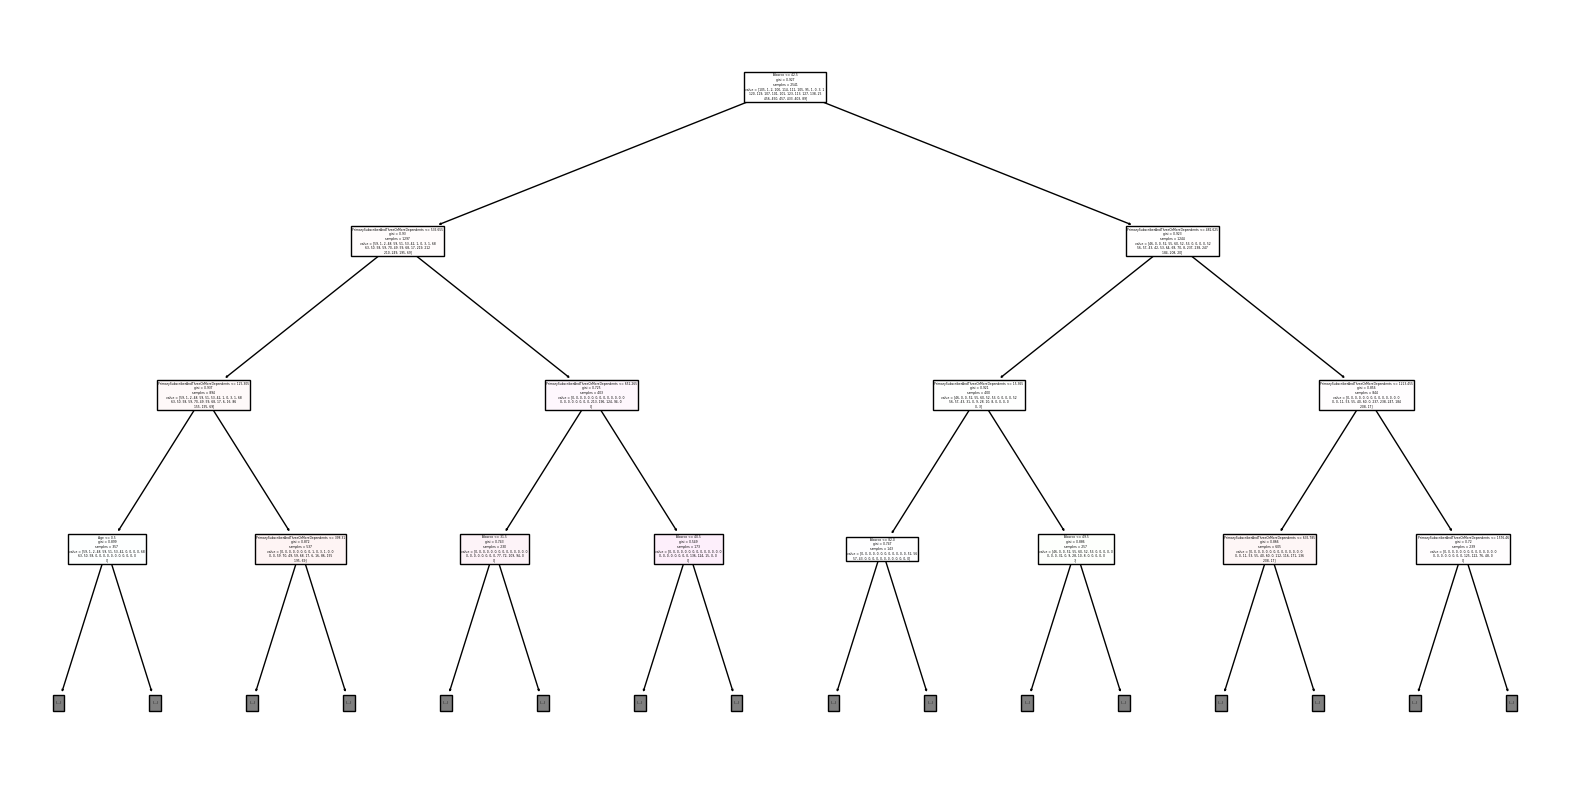

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming rf_model is your trained Random Forest model
# Select one of the trees from the Random Forest
estimator = rf_model.estimators_[2]  # Change 0 to another index to select a different tree

# Plot the selected tree
plt.figure(figsize=(20,10))
plot_tree(estimator, filled=True, feature_names=features,  max_depth=3)
plt.show()